# Численное дифференцирование

In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from math import *
import sympy

## Методы

Методы для изучения:

- 1. $f'(x) = \frac{f(x + h) - f(x)}{h}$
- 2. $f'(x) = \frac{f(x) - f(x - h)}{h}$
- 3. $f'(x) = \frac{f(x + h) - f(x - h)}{2h}$
- 4. $f'(x) = \frac{4}{3}\frac{f(x + h) - f(x - h)}{2h} - \frac{1}{3}\frac{f(x + 2h) - f(x - 2h)}{4h}$
- 5. $f'(x) = \frac{3}{2}\frac{f(x + h) - f(x - h)}{2h} - \frac{3}{5}\frac{f(x + 2h) - f(x - 2h)}{4h} + \frac{1}{10}\frac{f(x + 3h) - f(x - 3h)}{6h}$

In [91]:
methods = (
    lambda f, x, h: (f(x + h) - f(x)) / h,
    lambda f, x, h: (f(x) - f(x - h)) / h,
    lambda f, x, h: (f(x + h) - f(x - h)) / (2 * h),
    lambda f, x, h: (4 / 3) * (f(x + h) - f(x - h)) / (2 * h) 
                    - (1 / 3) * (f(x + 2 * h) - f(x - 2 * h)) / (4 * h),
    lambda f, x, h: (3 / 2) * (f(x + h) - f(x - h)) / (2 * h)
                    - (3 / 5) * (f(x + 2 * h) - f(x - 2 * h)) / (4 * h)
                    + (1 / 10) * (f(x + 3 * h) - f(x - 3 * h)) / (6 * h),
)

## Функции для анализа

* $f(x) = \sin(x^2)$
* $f(x) = \cos(\sin(x))$
* $f(x) = \exp(\sin(\cos(x)))$
* $f(x) = \ln(x+3)$
* $f(x) = (x+3)^{0.5}$

Для получения референсных значений производных $\text{ref}(x)$, алгебраически вычисляем значения соответствующих производных.

In [98]:
names = (
    r'$f(x) = \sin(x^2)$',
    r'$f(x) = \cos(\sin(x))$',
    r'$f(x) = \exp(\sin(\cos(x)))$',
    r'$f(x) = \ln(x+3)$',
    r'$f(x) = (x+3)^{0.5}$',
)

functions = (
    lambda x: np.sin(x**2),
    lambda x: np.cos(np.sin(x)),
    lambda x: np.exp(np.sin(np.cos(x))),
    lambda x: np.log(x + 3),
    lambda x: (x + 3)**0.5,
)

references = (
    lambda x: 2 * x * np.cos(x**2),
    lambda x: np.sin(np.sin(x)) * (-np.cos(x)),
    lambda x: np.sin(x) * np.cos(np.cos(x)) * (-np.exp(np.sin(np.cos(x)))),
    lambda x: 1 / (x + 3),
    lambda x: 0.5 / (x + 3)**0.5,
)

suite = zip(functions, references, names)

## Построение графиков

Для описания зависимости ошибки численного метода $\Delta = |\text{method}(x) - \text{ref}(x)|$ варьируем шаг $h$ : $h_n = \frac{2}{2^n}, n=1,2,3...21$.

Наже также приведены графики в двойном логарифмическом масштабе. На графиках можно наблюдать линейные участки.

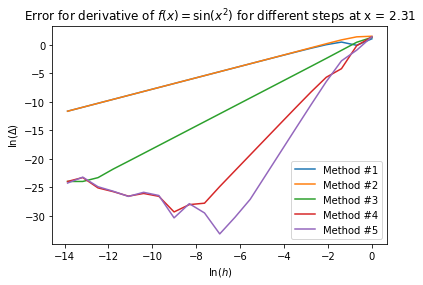

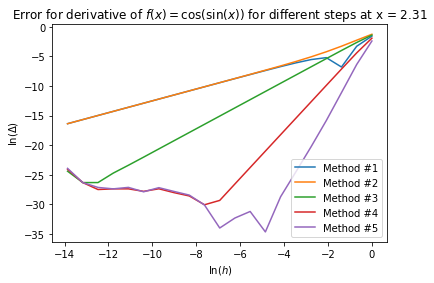

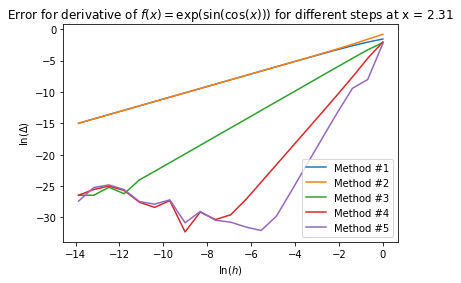

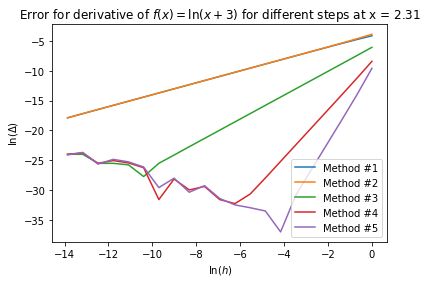

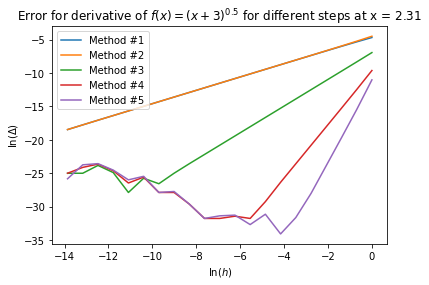

In [99]:
x = 2.31
n_max = 21

steps = np.array([(2 / 2**n) for n in range(1, n_max + 1)])

for fn, ref, name in suite:
    for i, method in enumerate(methods, start = 1):
        error = np.abs(method(fn, x, steps) - ref(x))
        plt.plot(np.log(steps), np.log(error), label = 'Method #{}'.format(i))  
    
    plt.xlabel(r'$\ln(h)$')
    plt.ylabel(r'$\ln(\Delta)$')
    plt.title('Error for derivative of {} for different steps at x = {}'.format(name, x))
    plt.legend()
    plt.show()